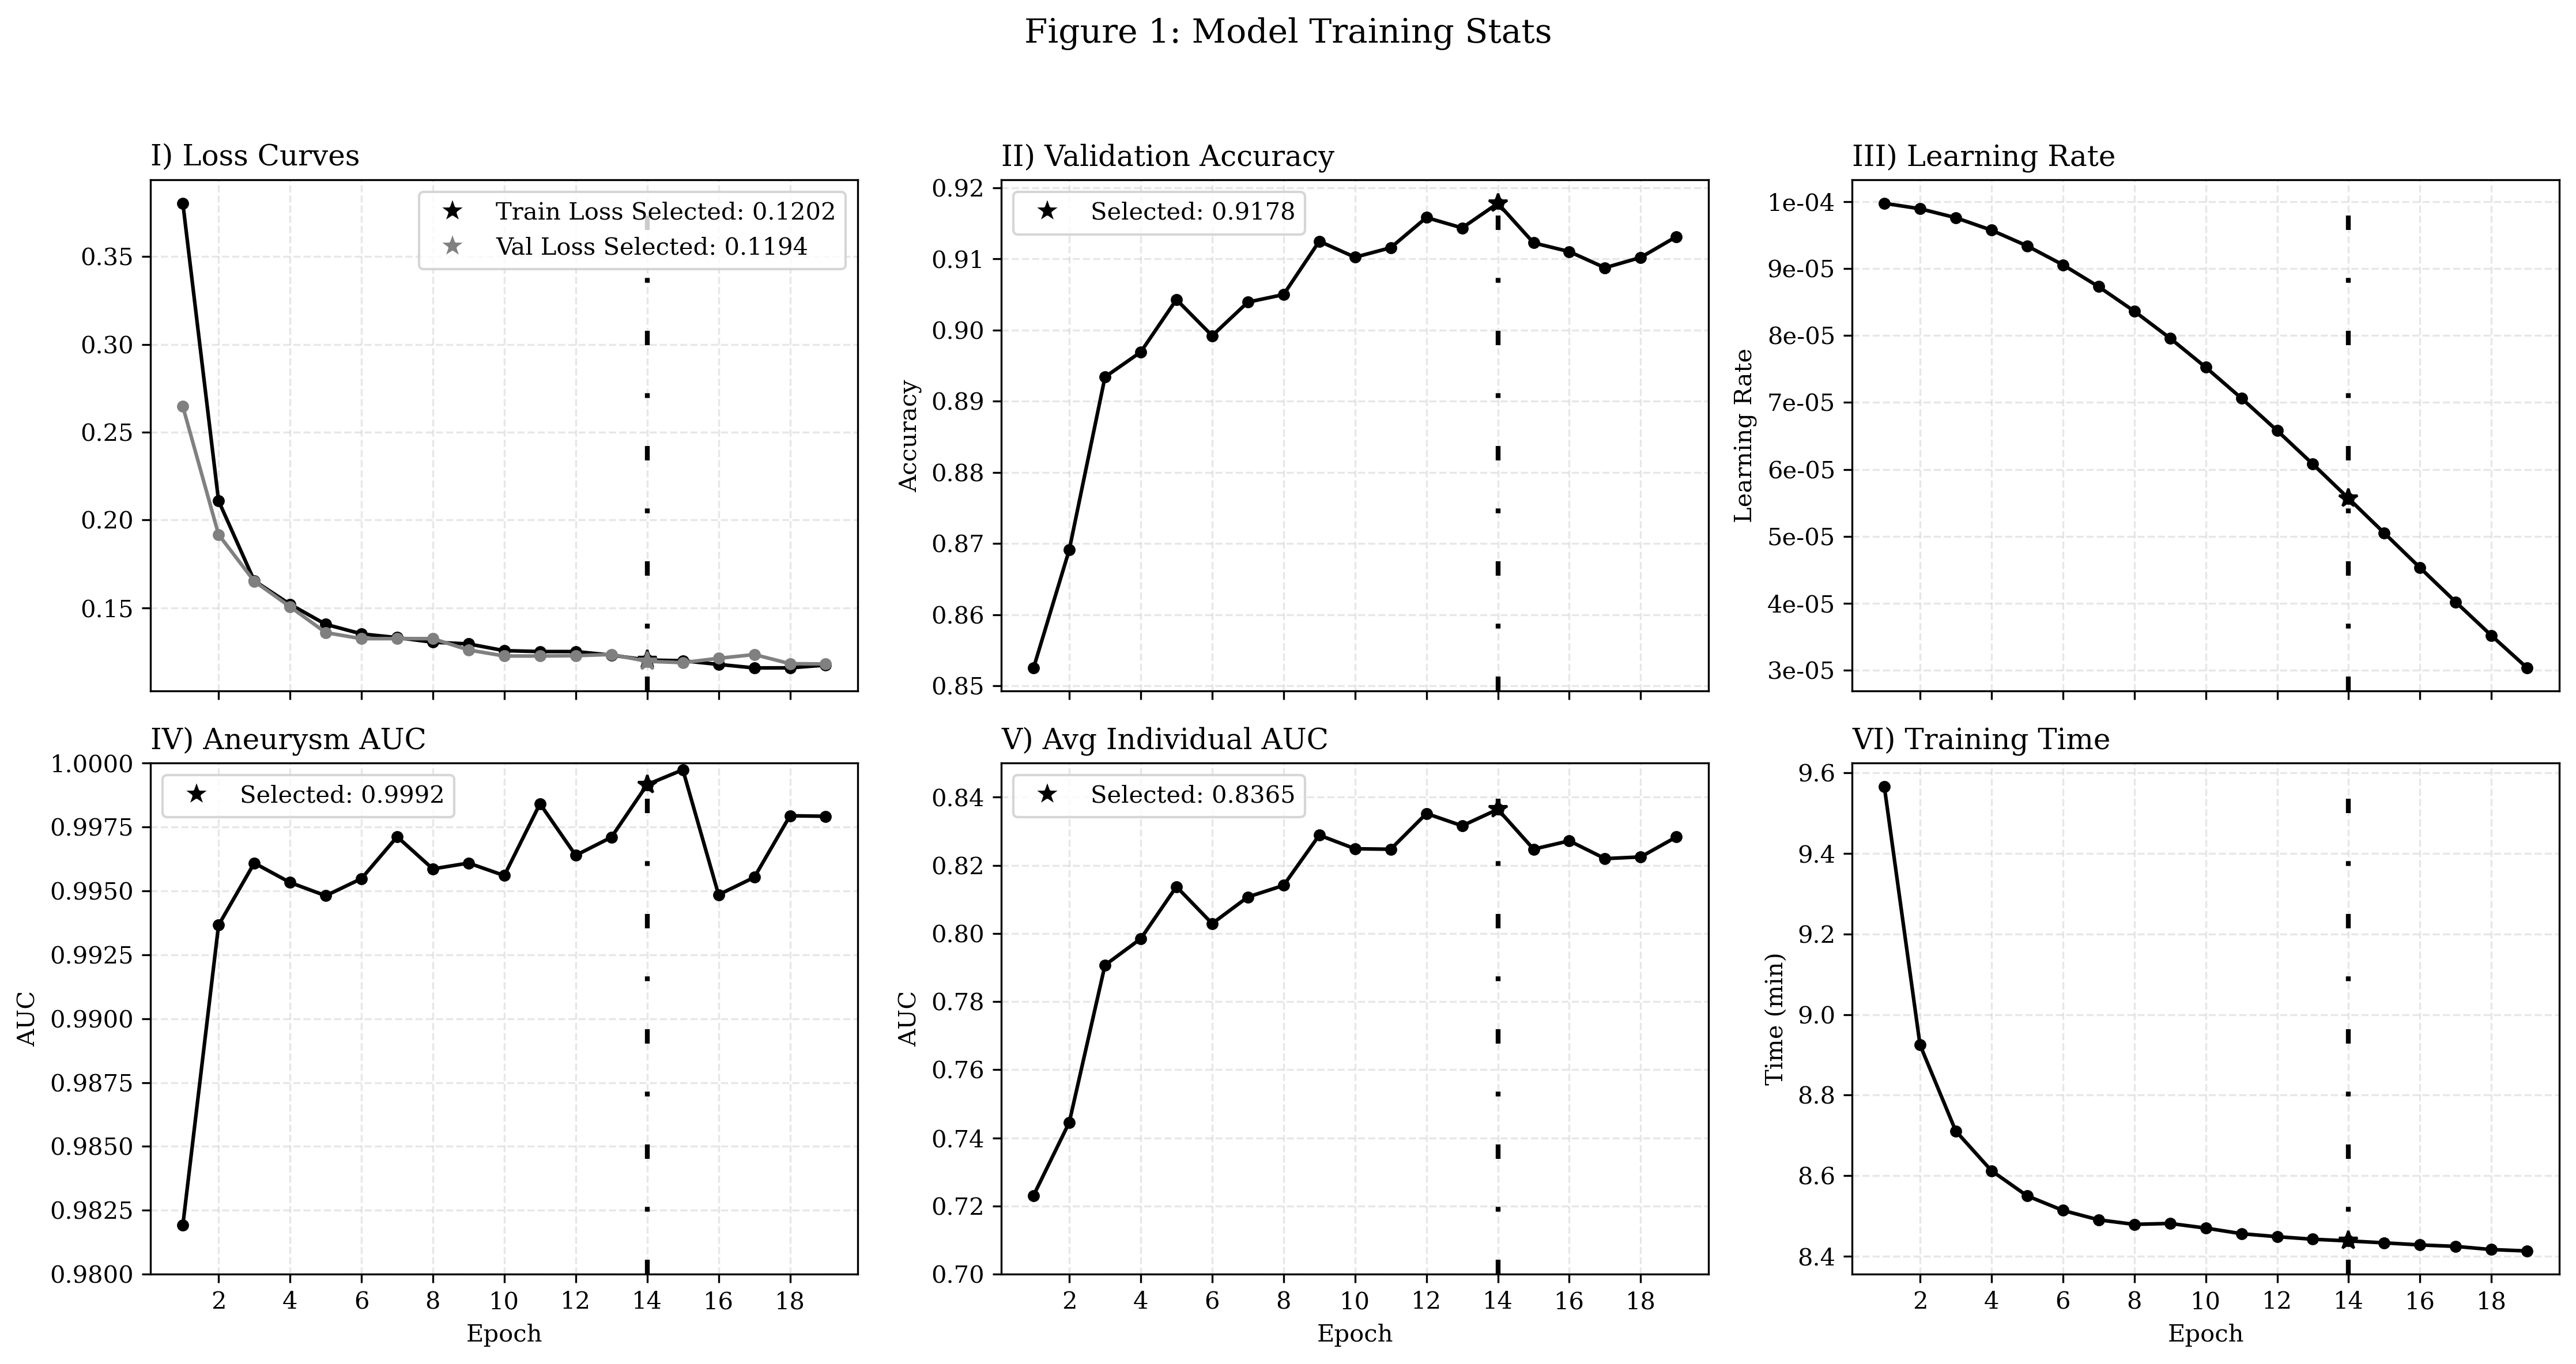

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import numpy as np

# Configure font for Times (LaTeX style)
plt.rcParams['font.family'] = 'serif'
title_fontsize = 12
label_fontsize = 10

# Main data
epochs = list(range(1, 20))
train_loss = [
    0.38044, 0.21092, 0.16530, 0.15194, 0.14052,
    0.13507, 0.13294, 0.13033, 0.12935, 0.12552,
    0.12500, 0.12499, 0.12296, 0.12017, 0.11975,
    0.11768, 0.11567, 0.11571, 0.11728
]
val_loss = [
    0.26462, 0.19166, 0.16505, 0.15058, 0.13580,
    0.13234, 0.13237, 0.13235, 0.12590, 0.12247,
    0.12244, 0.12264, 0.12334, 0.11943, 0.11868,
    0.12115, 0.12329, 0.11809, 0.11792
]
val_score = [
    0.85251, 0.86912, 0.89340, 0.89690, 0.90428,
    0.89920, 0.90392, 0.90498, 0.91248, 0.91023,
    0.91157, 0.91581, 0.91435, 0.91781, 0.91225,
    0.91102, 0.90875, 0.91020, 0.91313
]
learning_rate = [
    9.973e-05, 9.892e-05, 9.758e-05, 9.572e-05, 9.337e-05,
    9.055e-05, 8.729e-05, 8.362e-05, 7.960e-05, 7.525e-05,
    7.063e-05, 6.580e-05, 6.079e-05, 5.567e-05, 5.050e-05,
    4.533e-05, 4.021e-05, 3.520e-05, 3.037e-05
]
aneurysm_auc = [
    0.98192, 0.99366, 0.99609, 0.99533, 0.99481,
    0.99548, 0.99712, 0.99586, 0.99609, 0.99560,
    0.99841, 0.99639, 0.99710, 0.99916, 0.99974,
    0.99485, 0.99553, 0.99794, 0.99792
]
mean_auc = [
    0.72311, 0.74458, 0.79072, 0.79846, 0.81374,
    0.80291, 0.81071, 0.81411, 0.82886, 0.82486,
    0.82473, 0.83522, 0.83160, 0.83645, 0.82475,
    0.82719, 0.82197, 0.82247, 0.82834
]
training_time = [
    9 + 34/60, 8 + 17/60, 8 + 17/60, 8 + 19/60, 8 + 18/60,
    8 + 20/60, 8 + 21/60, 8 + 24/60, 8 + 30/60, 8 + 22/60,
    8 + 19/60, 8 + 22/60, 8 + 22/60, 8 + 23/60, 8 + 22/60,
    8 + 21/60, 8 + 22/60, 8 + 17/60, 8 + 21/60
]

best_epoch = 14
xticks = list(range(2, 20, 2))
linestyle_best = (0, (3,10,1,10))

# Cumulative average time per epoch
cumulative_time = np.cumsum(training_time)
epochs_arr = np.arange(1, len(training_time)+1)
data_per_time = cumulative_time / epochs_arr

val_at_best = {
    'train_loss': train_loss[best_epoch-1],
    'val_loss': val_loss[best_epoch-1],
    'val_score': val_score[best_epoch-1],
    'learning_rate': learning_rate[best_epoch-1],
    'aneurysm_auc': aneurysm_auc[best_epoch-1],
    'mean_auc': mean_auc[best_epoch-1],
    'training_time': data_per_time[best_epoch-1]
}

# Create 2x3 figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, dpi=300)
plt.suptitle('Figure 1: Model Training Stats', fontsize=14, x=0.5)
plt.subplots_adjust(hspace=0.4)

# General plotting function
def setup_plot(ax, title, xlabel, ylabel, color,
               ydata=None, y_best=None, show_best_label=True,
               markersize=4):
    if ydata is not None:
        # Plot the curve without label
        ax.plot(epochs, ydata, marker='o', markersize=markersize,
                color=color, label=None)
        # Plot best epoch marker
        if y_best is not None:
            ax.plot(best_epoch, y_best, marker='*', markersize=markersize+4,
                    color=color)
            # Create legend with larger star
            if show_best_label:
                star_legend = Line2D([0], [0], marker='*', color='w',
                                     markerfacecolor=color, markersize=12,
                                     label=f'Selected: {y_best:.4f}')
                ax.legend(handles=[star_legend], loc='best', fontsize=label_fontsize)

    ax.axvline(best_epoch, color='black', linestyle=linestyle_best, linewidth=2)
    ax.set_title(title, loc='left', fontsize=title_fontsize)
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabel, fontsize=label_fontsize)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_xticks(xticks)


# I) Loss Curves
axes[0,0].plot(epochs, train_loss, marker='o', markersize=4, color='black')
axes[0,0].plot(epochs, val_loss, marker='o', markersize=4, color='gray')

# Best epoch markers
axes[0,0].plot(best_epoch, val_at_best["train_loss"], marker='*', markersize=8, color='black')
axes[0,0].plot(best_epoch, val_at_best["val_loss"], marker='*', markersize=8, color='gray')

# Legend with larger stars
star_train_legend = Line2D([0], [0], marker='*', color='w',
                           markerfacecolor='black', markersize=12,
                           label=f'Train Loss Selected: {val_at_best["train_loss"]:.4f}')
star_val_legend = Line2D([0], [0], marker='*', color='w',
                         markerfacecolor='gray', markersize=12,
                         label=f'Val Loss Selected: {val_at_best["val_loss"]:.4f}')
axes[0,0].axvline(best_epoch, color='black', linestyle=linestyle_best, linewidth=2)
axes[0,0].set_title('I) Loss Curves', loc='left', fontsize=title_fontsize)
axes[0,0].set_xticks(xticks)
axes[0,0].grid(True, linestyle='--', alpha=0.3)
axes[0,0].legend(handles=[star_train_legend, star_val_legend], fontsize=label_fontsize)

# II) Validation Accuracy (no xlabel)
setup_plot(axes[0,1], 'II) Validation Accuracy', '', 'Accuracy',
           'black', ydata=val_score, y_best=val_at_best['val_score'], markersize=4)

# III) Learning Rate (no xlabel)
setup_plot(axes[0,2], 'III) Learning Rate', '', 'Learning Rate',
           'black', ydata=learning_rate, y_best=val_at_best['learning_rate'],
           show_best_label=False, markersize=4)
# Y-axis in scientific notation
axes[0,2].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0e}'))

# IV) Aneurysm AUC
setup_plot(axes[1,0], 'IV) Aneurysm AUC', 'Epoch', 'AUC',
           'black', ydata=aneurysm_auc, y_best=val_at_best['aneurysm_auc'], markersize=4)
axes[1,0].set_ylim(0.98, 1.0)

# V) Avg Individual AUC
setup_plot(axes[1,1], 'V) Avg Individual AUC', 'Epoch', 'AUC',
           'black', ydata=mean_auc, y_best=val_at_best['mean_auc'], markersize=4)
axes[1,1].set_ylim(0.7, 0.85)

# VI) Training Time
setup_plot(axes[1,2], 'VI) Training Time', 'Epoch', 'Time (min)',
           'black', ydata=data_per_time, y_best=val_at_best['training_time'],
           show_best_label=False, markersize=4)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
